### predict clinvar w/ mpc
* eval on missesne
* must have mpc score

In [4]:
import pandas, pydot, pydotplus, graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics, tree, svm
from sklearn.neural_network import MLPClassifier
from sklearn.externals.six import StringIO
from IPython.display import HTML
%matplotlib inline

In [3]:
def calc_final_sig(row):
    sig_set = set(str(row['clinSig'].split('|')))
    has_benign = '2' in sig_set or '3' in sig_set
    has_path = '4' in sig_set or '5' in sig_set
    if has_path and not has_benign:
        return 1
    if not has_path and has_benign:
        return 0
    return -1

clin_file = '../data/interim/clinvar/clinvar.dat'
clinvar_df_pre = pandas.read_csv(clin_file, sep='\t').fillna(0)
clinvar_df_pre.loc[:, "y"] = clinvar_df_pre.apply(calc_final_sig, axis=1)
p = clinvar_df_pre[ (clinvar_df_pre.y==1) & (clinvar_df_pre.mpc>0) & (clinvar_df_pre.eff=='missense_variant')]
b = clinvar_df_pre[ (clinvar_df_pre.y==0) & (clinvar_df_pre.mpc>0) & (clinvar_df_pre.eff=='missense_variant')]
print('# clinvar variants with missesense pathogenic and mpc score', len(p))
print('# clinvar variants with missense benign and mpc score', len(b))

p = len(p[['chrom','pos']].drop_duplicates())
b = len(b[['chrom','pos']].drop_duplicates())
print('# clinvar positions with missesnse pathogenic and mpc score', p)
print('# clinvar positions with missense benign and mpc score', b)

clinvar_df = clinvar_df_pre[(clinvar_df_pre.mpc>0) & (clinvar_df_pre.eff=='missense_variant')]

# clinvar variants with missesense pathogenic and mpc score 966
# clinvar variants with missense benign and mpc score 374
# clinvar positions with missesnse pathogenic and mpc score 934
# clinvar positions with missense benign and mpc score 371


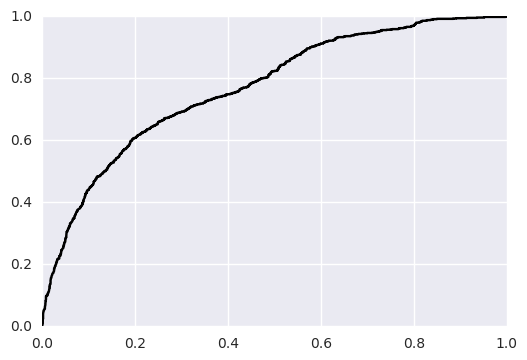

In [8]:
scores = clinvar_df['mpc'].values
truth = clinvar_df['y'].values
fpr_mpc, tpr_mpc, _ = metrics.roc_curve(truth, scores, pos_label=1)
plt.plot(fpr_mpc, tpr_mpc, label='mpc', color='black')
plt.savefig('../docs/plots/clinvar_mis_mpc_roc.png')